# Myntra Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('D:\\Downloads\\archive (3)\\myntra_products.csv')

In [5]:
print(df.head())

                     product_name      brand_name  rating  rating_count  \
0   Croc Textured Two Fold Wallet     Lino Perros     0.0             0   
1             Men Striped Sliders  Mast & Harbour     4.0            76   
2            Printed A-line Kurta            Biba     4.3            66   
3    Girls Floral Printed T-shirt        Anthrilo     0.0             0   
4  Women Printed Kurta with Skirt    FASHION DWAR     0.0             0   

   marked_price  discounted_price                      sizes  \
0          1295               828                    Onesize   
1          1299               584  UK6,UK7,UK8,UK9,UK10,UK11   
2          1999              1599           S,M,L,XL,XXL,3XL   
3           599               539            7-8Y,8-9Y,9-10Y   
4          2899              2899                   S,M,L,XL   

                                        product_link  \
0  wallets/lino-perros/lino-perros-women-peach-co...   
1  flip-flops/mast--harbour/mast--harbour-men-nav...

In [6]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print("Data Types:")
print(df.dtypes)
df.dropna(subset=['rating_count', 'rating'], inplace=True)

Data Types:
product_name         object
brand_name           object
rating              float64
rating_count          int64
marked_price          int64
discounted_price      int64
sizes                object
product_link         object
img_link             object
product_tag          object
brand_tag            object
discount_amount       int64
discount_percent      int64
dtype: object


# Top Rated Products

In [7]:
top_rated_products = df.nlargest(10, 'rating')
print("Top Rated Products:")
print(top_rated_products[['product_name', 'rating', 'rating_count']])

Top Rated Products:
                        product_name  rating  rating_count
107       Women Front Tie Peplum Top     5.0             2
134             Georgette Midi Dress     5.0             3
349    Girls Printed Top with Shorts     5.0             7
356    Girls Printed Top with Shorts     5.0             7
365         Motif-detail sweatshorts     5.0             5
865   Men Brand Logo Printed T-shirt     5.0             6
880              Men Printed T-shirt     5.0             8
890                Solid T-shirt Bra     5.0             8
966         Solid Block Heeled Mules     5.0             6
1215        Rapid-Dry Printed Tights     5.0             7


# Products with the Highest Number of Rating

In [8]:
highest_rated_count_products = df.nlargest(10, 'rating_count')
print("Products with the Highest Number of Rating:")
print(highest_rated_count_products[['product_name', 'rating', 'rating_count']])

Products with the Highest Number of Rating:
                              product_name  rating  rating_count
33432            Unisex Skin Care Gift Set     4.4         55900
59424               Kajal & Bold Liner Set     4.5         54600
128773           Unisex Skin Care Gift Set     4.4         51000
128808           Unisex Skin Care Gift Set     4.4         51000
104447  Printed Cotton Pure Cotton T-shirt     4.3         49300
108846                  Skin Care Gift Set     4.4         39100
75597        Toner-Cream-Serum-Night Cream     4.3         38600
75647        Toner-Cream-Serum-Night Cream     4.3         38600
160063        Set of Foundation & Eyeliner     4.4         37000
83734            Set of Eyeliner & Mascara     4.5         36200


# Correlation between Ratings and Number of Ratings Received

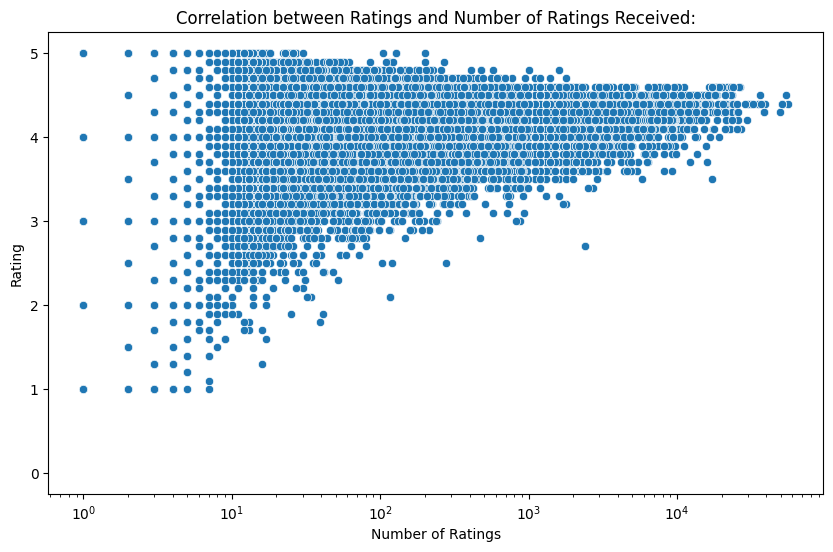

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating_count', y='rating')
plt.title("Correlation between Ratings and Number of Ratings Received:")
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.xscale('log')
plt.yscale('linear')
plt.show()


# Average Marked Price and Discounted Price by Brand

In [10]:
df['marked_price'] = pd.to_numeric(df['marked_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df.dropna(subset=['marked_price', 'discounted_price'], inplace=True)
avg_price_by_brand = df.groupby('brand_name')[['marked_price', 'discounted_price']].mean().reset_index()
print("Average Marked Price and Discounted Price by Brand:")
print(avg_price_by_brand)

Average Marked Price and Discounted Price by Brand:
          brand_name  marked_price  discounted_price
0     1 Stop Fashion   5339.000000       1334.000000
1           1st Step   2999.000000       2699.000000
2          20Dresses   1757.377210       1287.035363
3         39 THREADS    969.666667        581.666667
4               3PIN    599.000000        341.000000
...              ...           ...               ...
3189             x2o   2659.000000        735.100000
3190          yelloe   2138.275862        887.724138
3191            yoho    727.571429        517.571429
3192            zebu   1410.235294        510.176471
3193          zink Z   1533.615385       1380.153846

[3194 rows x 3 columns]


# Average Discount Percentage Across All Products

In [11]:
df['discount_percentage'] = (df['marked_price'] - df['discounted_price']) / df['marked_price']*100
avg_discount_percentage = df['discount_percentage'].mean()
print("Average Discount Percentage Across All Products:")
print(f"{avg_discount_percentage:.2f}%")

Average Discount Percentage Across All Products:
37.29%


# Average Discounted Prices by Brand

In [12]:
discounted_prices_by_brand = df.groupby('brand_name')['discounted_price'].mean().reset_index()
print("Average Discounted Prices by Brand:")
print(discounted_prices_by_brand)

Average Discounted Prices by Brand:
          brand_name  discounted_price
0     1 Stop Fashion       1334.000000
1           1st Step       2699.000000
2          20Dresses       1287.035363
3         39 THREADS        581.666667
4               3PIN        341.000000
...              ...               ...
3189             x2o        735.100000
3190          yelloe        887.724138
3191            yoho        517.571429
3192            zebu        510.176471
3193          zink Z       1380.153846

[3194 rows x 2 columns]


# Top 20 Average Discounted Prices by Brand

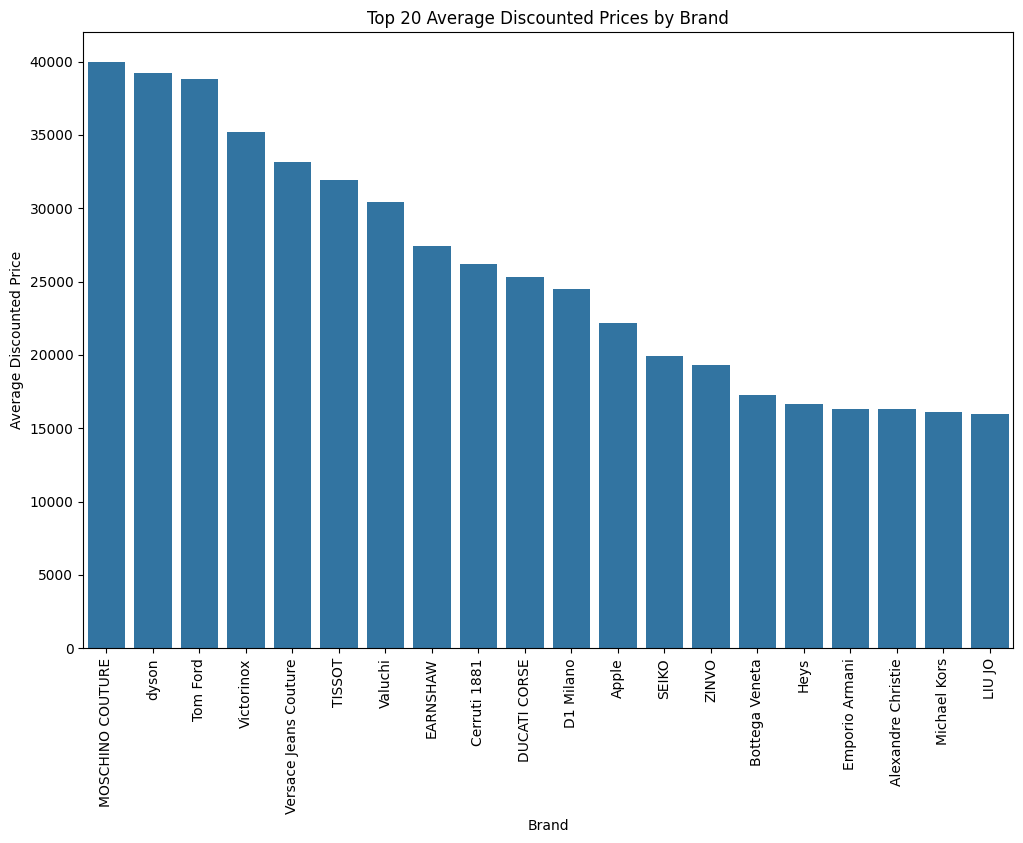

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
top_brands = discounted_prices_by_brand.nlargest(20, 'discounted_price')
plt.figure(figsize=(12,8))
sns.barplot(x='brand_name', y='discounted_price', data=top_brands)
plt.xticks(rotation=90)
plt.title("Top 20 Average Discounted Prices by Brand")
plt.xlabel("Brand")
plt.ylabel("Average Discounted Price")
plt.show()

# Which Brands Have the Highest Average Ratings?

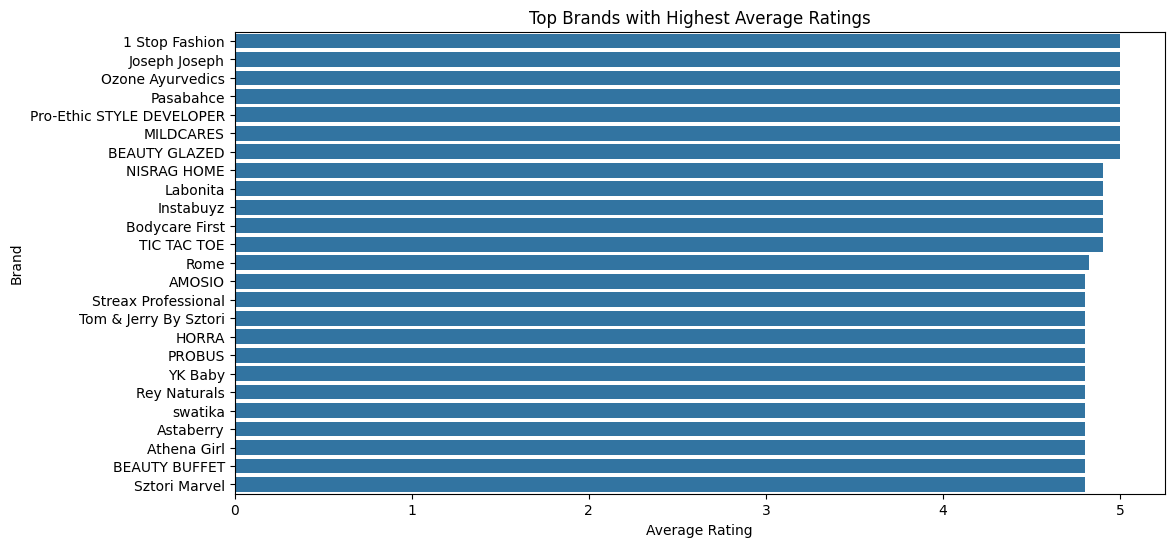

In [23]:
avg_ratings_by_brand = df.groupby('brand_name')['rating'].mean().reset_index()
avg_ratings_by_brand = avg_ratings_by_brand.sort_values(by='rating', ascending=False)
top_average_ratings = avg_ratings_by_brand.head(25)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='brand_name', data=top_average_ratings)
plt.title("Top Brands with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()

# Which Brands Have the Most Products Listed?

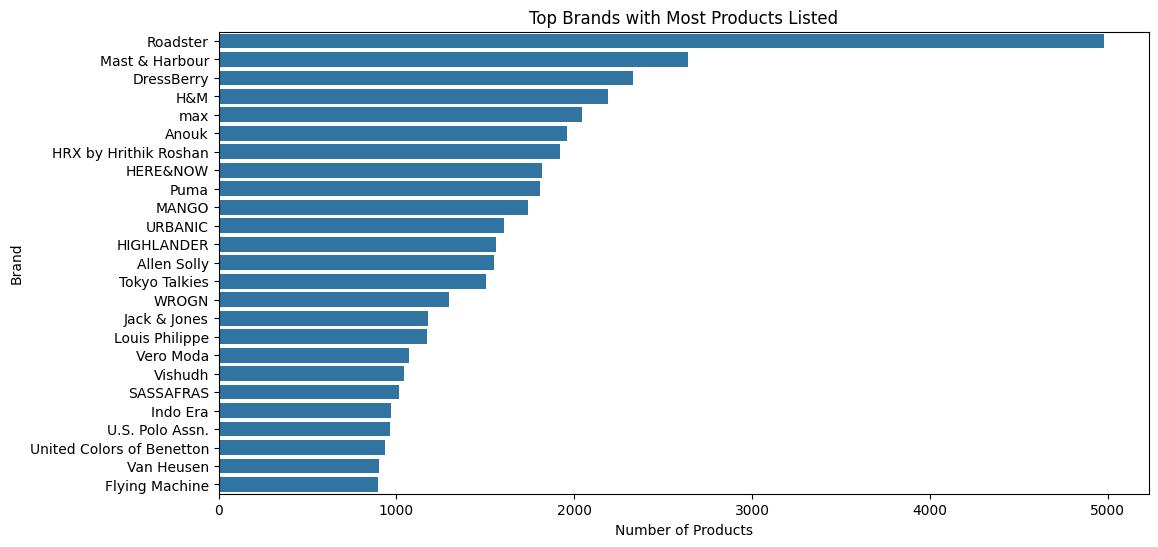

In [21]:
product_count_by_brand = df['brand_name'].value_counts().reset_index()
product_count_by_brand.columns = ['brand_name', 'product_count']
top_product_count = product_count_by_brand.head(25)
plt.figure(figsize=(12, 6))
sns.barplot(x='product_count', y='brand_name', data=top_product_count)
plt.title("Top Brands with Most Products Listed")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

# How Do Discounting Strategies Vary Across Different Brands?

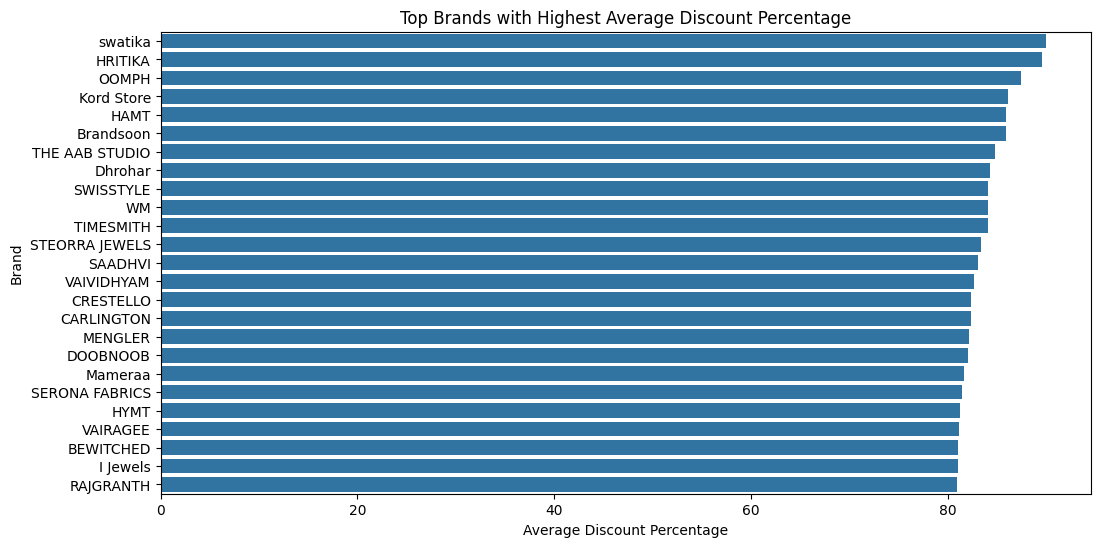

In [22]:
df['discount_percentage'] = ((df['marked_price'] - df['discounted_price']) / df['marked_price'])*100
avg_discount_by_brand = df.groupby('brand_name')['discount_percentage'].mean().reset_index()
avg_discount_by_brand = avg_discount_by_brand.sort_values(by='discount_percentage', ascending=False)
top_avg_discount = avg_discount_by_brand.head(25)
plt.figure(figsize=(12, 6))
sns.barplot(x='discount_percentage', y='brand_name', data=top_avg_discount)
plt.title("Top Brands with Highest Average Discount Percentage")
plt.xlabel("Average Discount Percentage")
plt.ylabel("Brand")
plt.show()

# Which Product Tags Are Associated with the Highest-Rated Products?

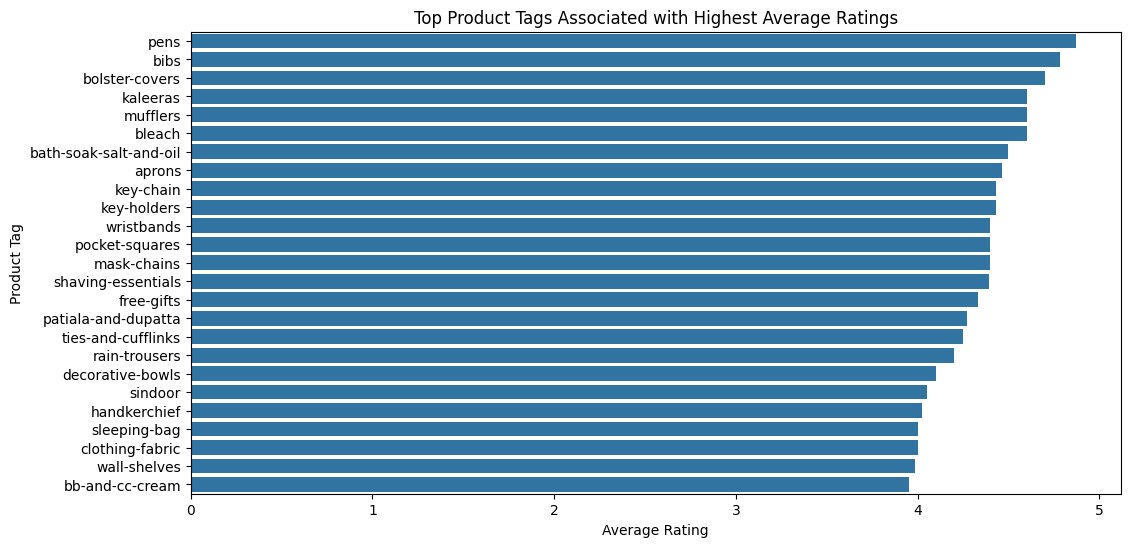

In [25]:
tags_split = df.explode('product_tag')
avg_rating_by_tag = tags_split.groupby('product_tag')['rating'].mean().reset_index()
avg_rating_by_tag = avg_rating_by_tag.sort_values(by='rating', ascending=False)
top_avg_rating_tags = avg_rating_by_tag.head(25)
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='product_tag', data=top_avg_rating_tags)
plt.title("Top Product Tags Associated with Highest Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Product Tag")
plt.show()

# How Do Products with Specific Tags Perform in Terms of Ratings and Discounts?

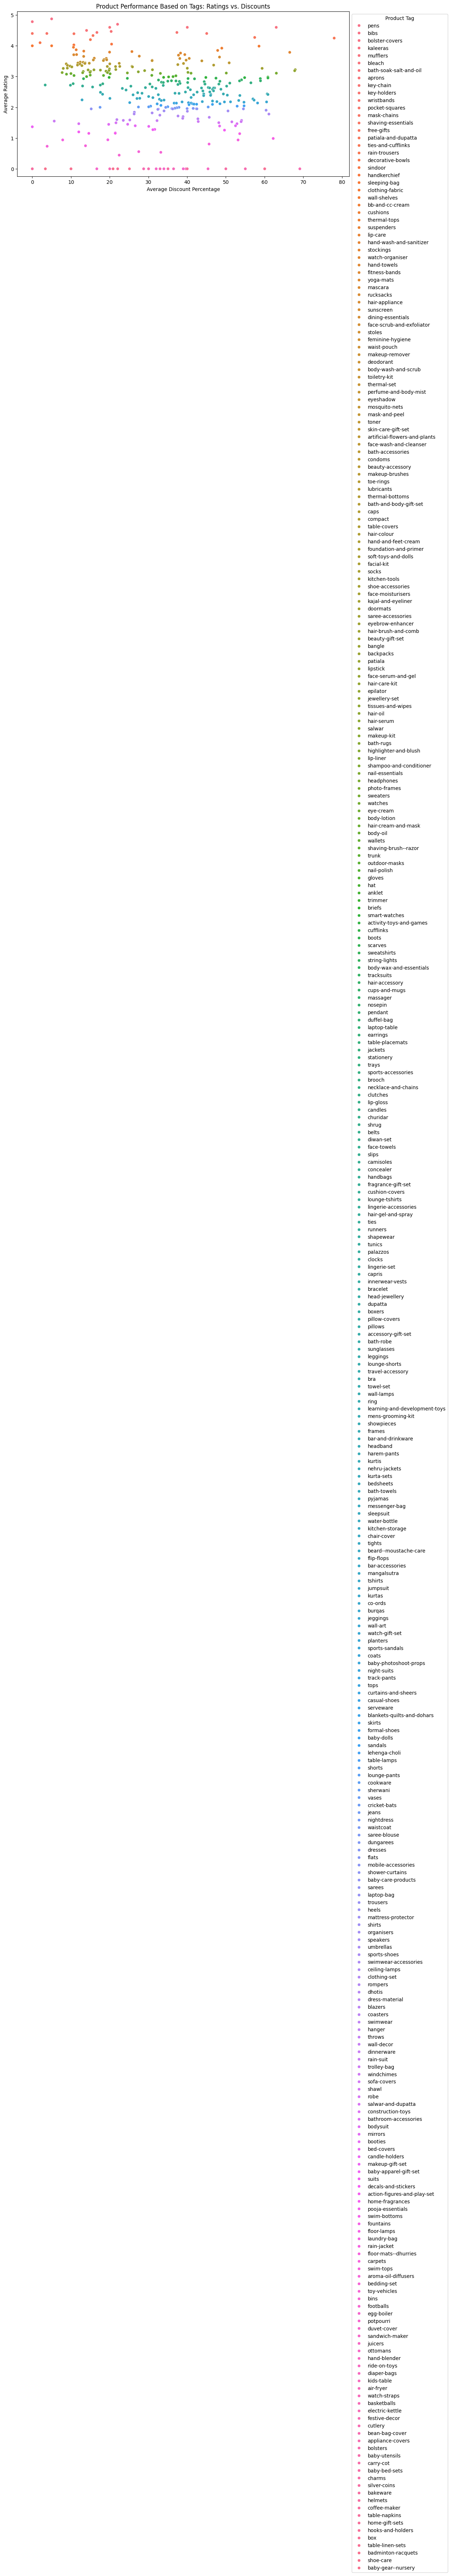

In [26]:
tags_split['discount_percentage'] = ((tags_split['marked_price'] - tags_split['discounted_price']) / tags_split['marked_price'])*100
performance_by_tag = tags_split.groupby('product_tag').agg({
    'rating':'mean',
    'discount_percentage':'mean'
}).reset_index()
performance_by_tag = performance_by_tag.sort_values(by='rating', ascending=False)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percentage', y='rating', hue='product_tag', data=performance_by_tag)
plt.title("Product Performance Based on Tags: Ratings vs. Discounts")
plt.xlabel("Average Discount Percentage")
plt.ylabel("Average Rating")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Product Tag')
plt.show()

# Do Products with Higher Ratings Tend to Have Lower Discounted Prices?

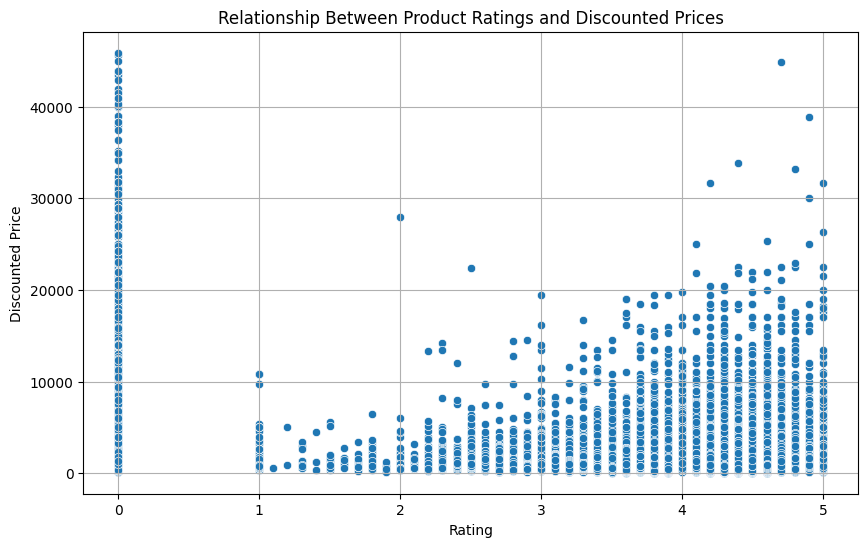

Correlation between Ratings and Discounted Prices: -0.17


In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='discounted_price', data=df)
plt.title("Relationship Between Product Ratings and Discounted Prices")
plt.xlabel("Rating")
plt.ylabel("Discounted Price")
plt.grid()
plt.show()

correlation = df['rating'].corr(df['discounted_price'])
print(f"Correlation between Ratings and Discounted Prices: {correlation:.2f}")

# What is the Relationship Between Rating Count and the Level of Discount Offered?

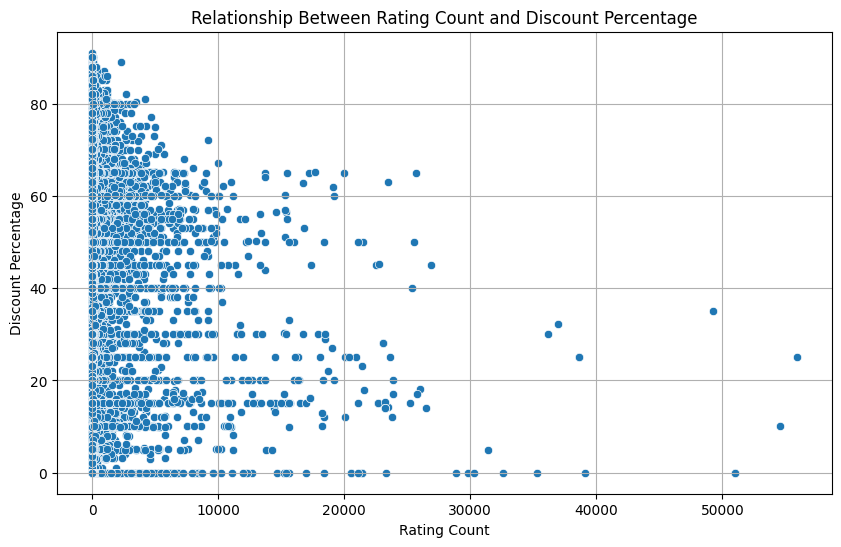

Correlation between Rating Count and Discount Percentage: 0.01


In [28]:
df['discount_percentage'] = ((df['marked_price'] - df['discounted_price']) / df['marked_price']) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='discount_percentage', data=df)
plt.title("Relationship Between Rating Count and Discount Percentage")
plt.xlabel("Rating Count")
plt.ylabel("Discount Percentage")
plt.grid()
plt.show()

correlation_count_discount = df['rating_count'].corr(df['discount_percentage'])
print(f"Correlation between Rating Count and Discount Percentage: {correlation_count_discount:.2f}")

# Which brands have the highest number of products listed?

C:\Users\iamai\AppData\Local\Temp\ipykernel_41428\1193027942.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_count', y='brand_name', data=brand_popularity.head(10), palette='viridis')


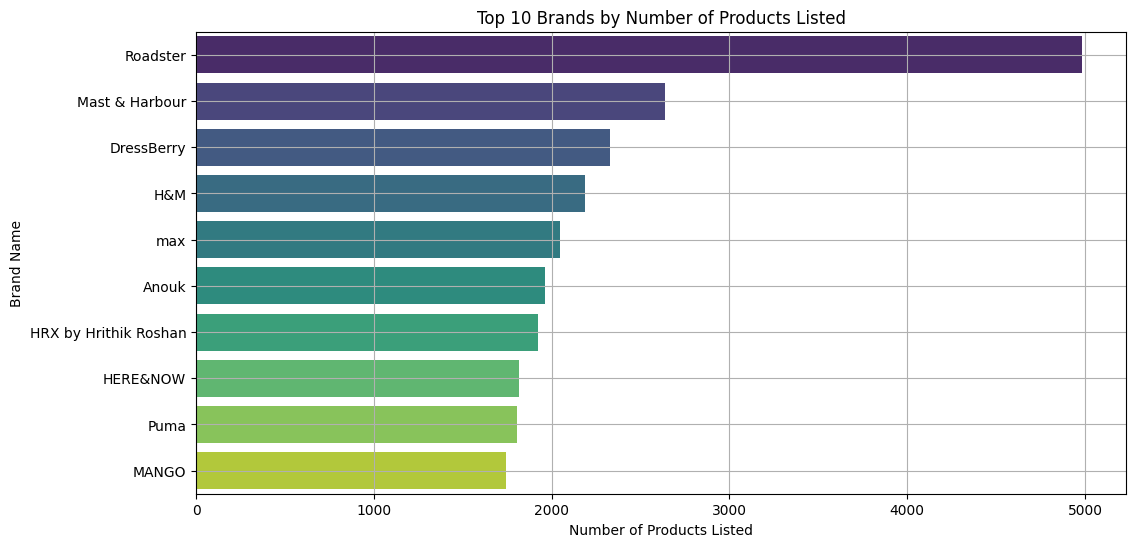

In [30]:
brand_popularity = df['brand_name'].value_counts().reset_index()
brand_popularity.columns = ['brand_name', 'product_count']
brand_popularity = brand_popularity.sort_values(by='product_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='product_count', y='brand_name', data=brand_popularity.head(10), palette='viridis')
plt.title("Top 10 Brands by Number of Products Listed")
plt.xlabel("Number of Products Listed")
plt.ylabel("Brand Name")
plt.grid()
plt.show()

In [29]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
top_brands = df['brand_name'].value_counts().nlargest(5).index  # Get top 5 brands by product count
brand_price_trends = df[df['brand_name'].isin(top_brands)].groupby(['release_year', 'brand_name'])['discounted_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='discounted_price', hue='brand_name', data=brand_price_trends, marker='o')
plt.title("Average Discounted Prices of Popular Brands Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average Discounted Price")
plt.legend(title='Brand Name')
plt.grid()
plt.show()

KeyError: 'release_date'

# What are the average ratings of these brands?

C:\Users\iamai\AppData\Local\Temp\ipykernel_41428\2869008192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='brand_name', data=brand_summary.head(10), palette='plasma')


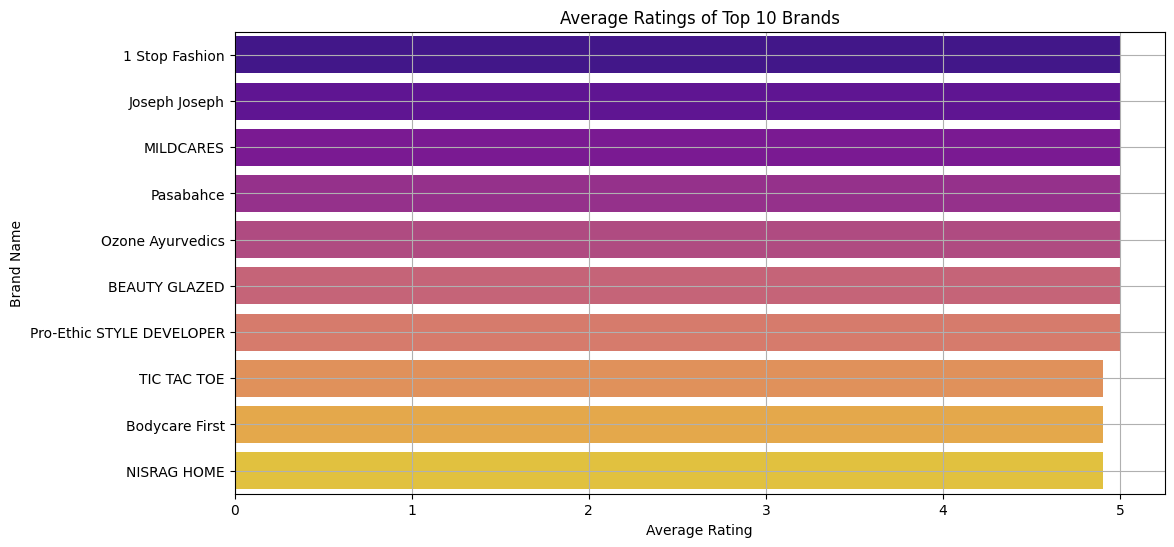

In [31]:
brand_rating = df.groupby('brand_name')['rating'].mean().reset_index().rename(columns={'rating': 'average_rating'})
brand_summary = pd.merge(brand_popularity, brand_rating, on='brand_name')
brand_summary = brand_summary.sort_values(by='average_rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='brand_name', data=brand_summary.head(10), palette='plasma')
plt.title("Average Ratings of Top 10 Brands")
plt.xlabel("Average Rating")
plt.ylabel("Brand Name")
plt.grid()
plt.show()